In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
import numpy as np
sys.path.append("../../")
from plotting.analysis import MultibandAnalysis

In [4]:
from importlib import reload
import logging
reload(logging)

logging.basicConfig(level=logging.DEBUG)

In [5]:
import toml


toml_string = """
[sideband_data]
run_numbers = [3]
data = "opendata_bnb"
blinded = false
truth_filtered_sets = ["nue", "drt"]
loadshowervariables = false
loadsystematics = true
use_bdt = false
loadpi0variables = false
numupresel = true
load_crt_vars = true
loadnumuvariables = true
enable_cache = true

[sideband]
selection = "NUMU"
preselection = "NUMU"

[sideband.binning]
variable = "neutrino_energy"
n_bins = 14
limits = [0.15, 1.55]
label = "Neutrino reconstructed energy [GeV]"

[sideband.uncertainties]
include_multisim_errors = true
add_ext_error_floor = false
use_sideband = false

[signal_data]
run_numbers = [1]
data = "opendata_bnb"
blinded = false
# truth_filtered_sets = ["nue", "drt", "cc_pi0", "nc_pi0", "cc_nopi", "cc_cpi", "nc_nopi", "nc_cpi"]
truth_filtered_sets = ["nue", "drt"]
loadshowervariables = true
loadsystematics = true
loadpi0variables = true
loadrecoveryvars = true
load_lee = true
enable_cache=true

[[signal]]

    selection = "NPBDT"
    preselection = "NP"
    # mc_hist_generator_cls = "SpectralSoBGenerator"
    mc_hist_generator_cls = "SignalOverBackgroundGenerator"

    [signal.uncertainties]
    include_multisim_errors = true
    add_ext_error_floor = false
    use_sideband = true

    [signal.binning]
    variable = "reco_e"
    # n_bins = 17
    # limits = [0.01, 2.39]
    # Reproduce technote
    n_bins = 10
    limits = [0.15, 1.55]
    label = "Reconstructed Energy [ GeV ]"

    [[signal.parameter]]
    name = "signal_strength"
    value = 1.0
    bounds = [0.0, 10.0]

    # [[signal.parameter]]
    # name = "delta_gamma"
    # value = 0.0
    # bounds = [-1.0, 1.0]

[[signal]]

    selection = "ZPBDT"
    preselection = "ZP"
    # mc_hist_generator_cls = "SpectralSoBGenerator"
    mc_hist_generator_cls = "SignalOverBackgroundGenerator"

    [signal.uncertainties]
    include_multisim_errors = true
    add_ext_error_floor = false
    use_sideband = true

    [signal.binning]
    variable = "reco_e"
    # n_bins = 17
    # limits = [0.01, 2.39]
    # Reproduce technote
    n_bins = 10
    limits = [0.15, 1.55]
    label = "Reconstructed Energy [ GeV ]"

    [[signal.parameter]]
    name = "signal_strength"
    value = 1.0
    bounds = [0.0, 10.0]

    # [[signal.parameter]]
    # name = "delta_gamma"
    # value = 0.0
    # bounds = [-1.0, 1.0]
"""

lee_analysis = MultibandAnalysis(toml.loads(toml_string))

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


Making generator for selection NUMU and preselection NUMU


DEBUG:plotting.histogram:Creating histogram generator for with binning: Binning(variable='neutrino_energy', bin_edges=array([0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95, 1.05, 1.15,
       1.25, 1.35, 1.45, 1.55]), label='Neutrino reconstructed energy [GeV]', is_log=False)
DEBUG:plotting.histogram:Creating histogram generator for with binning: Binning(variable='neutrino_energy', bin_edges=array([0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95, 1.05, 1.15,
       1.25, 1.35, 1.45, 1.55]), label='Neutrino reconstructed energy [GeV]', is_log=False)
DEBUG:plotting.histogram:Creating histogram generator for with binning: Binning(variable='neutrino_energy', bin_edges=array([0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95, 1.05, 1.15,
       1.25, 1.35, 1.45, 1.55]), label='Neutrino reconstructed energy [GeV]', is_log=False)


Loading lee sample
Making generator for selection NPBDT and preselection NP


DEBUG:plotting.histogram:Creating histogram generator for with binning: Binning(variable='reco_e', bin_edges=array([0.15, 0.29, 0.43, 0.57, 0.71, 0.85, 0.99, 1.13, 1.27, 1.41, 1.55]), label='Reconstructed Energy [ GeV ]', is_log=False)
DEBUG:plotting.histogram:Creating histogram generator for with binning: Binning(variable='reco_e', bin_edges=array([0.15, 0.29, 0.43, 0.57, 0.71, 0.85, 0.99, 1.13, 1.27, 1.41, 1.55]), label='Reconstructed Energy [ GeV ]', is_log=False)
DEBUG:plotting.histogram:Creating histogram generator for with binning: Binning(variable='reco_e', bin_edges=array([0.15, 0.29, 0.43, 0.57, 0.71, 0.85, 0.99, 1.13, 1.27, 1.41, 1.55]), label='Reconstructed Energy [ GeV ]', is_log=False)
DEBUG:plotting.histogram:Creating histogram generator for with binning: Binning(variable='reco_e', bin_edges=array([0.15, 0.29, 0.43, 0.57, 0.71, 0.85, 0.99, 1.13, 1.27, 1.41, 1.55]), label='Reconstructed Energy [ GeV ]', is_log=False)
DEBUG:plotting.histogram:Creating histogram generator fo

Making generator for selection ZPBDT and preselection ZP


DEBUG:plotting.histogram:Histogram found in cache.
DEBUG:plotting.histogram:Using cached total covariance matrix.
DEBUG:plotting.histogram:Histogram found in cache.
DEBUG:plotting.histogram:Using cached total covariance matrix.
DEBUG:plotting.histogram:Histogram found in cache.
DEBUG:plotting.histogram:Using cached total covariance matrix.
DEBUG:plotting.histogram:Histogram found in cache.
DEBUG:plotting.histogram:Using cached total covariance matrix.
DEBUG:plotting.histogram:Multisim histogram found in cache.
DEBUG:plotting.histogram:Multisim histogram found in cache.
DEBUG:plotting.histogram:Histogram found in cache.
DEBUG:plotting.histogram:Using cached total covariance matrix.
DEBUG:plotting.histogram:Histogram found in cache.
DEBUG:plotting.histogram:Using cached total covariance matrix.
DEBUG:plotting.histogram:Multisim histogram found in cache.
DEBUG:plotting.histogram:Multisim histogram found in cache.
DEBUG:plotting.histogram:Histogram found in cache.
DEBUG:plotting.histogram:

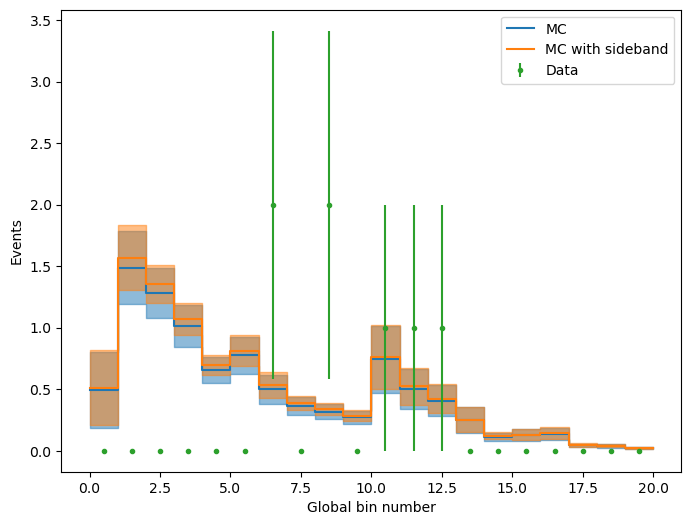

In [18]:
from matplotlib import pyplot as plt


mc_hist_with_sideband = lee_analysis.generate_multiband_histogram(include_multisim_errors=True, use_sideband=True)
mc_hist = lee_analysis.generate_multiband_histogram(include_multisim_errors=True, use_sideband=False)
data_hist = lee_analysis.generate_multiband_data_histogram()
fig, ax = plt.subplots(figsize=(8, 6))

mc_hist.draw(ax=ax, label="MC")
mc_hist_with_sideband.draw(ax=ax, label="MC with sideband")
data_hist.draw(ax=ax, label="Data", as_errorbars=True)
ax.legend()

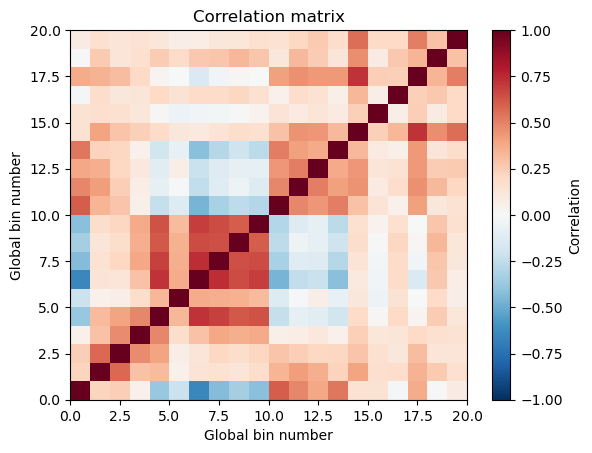

In [26]:
mc_hist_with_sideband.draw_covariance_matrix(as_correlation=True)

DEBUG:plotting.histogram:Histogram found in cache.
DEBUG:plotting.histogram:Using cached total covariance matrix.
DEBUG:plotting.histogram:Histogram found in cache.
DEBUG:plotting.histogram:Using cached total covariance matrix.
DEBUG:plotting.histogram:Histogram found in cache.
DEBUG:plotting.histogram:Using cached total covariance matrix.
DEBUG:plotting.histogram:Histogram found in cache.
DEBUG:plotting.histogram:Using cached total covariance matrix.
DEBUG:plotting.histogram:Histogram found in cache.
DEBUG:plotting.histogram:Using cached total covariance matrix.
DEBUG:plotting.histogram:Histogram found in cache.
DEBUG:plotting.histogram:Using cached total covariance matrix.
DEBUG:plotting.histogram:Histogram found in cache.
DEBUG:plotting.histogram:Using cached total covariance matrix.
DEBUG:plotting.histogram:Histogram found in cache.
DEBUG:plotting.histogram:Using cached total covariance matrix.
DEBUG:plotting.histogram:Histogram found in cache.
DEBUG:plotting.histogram:Using cached

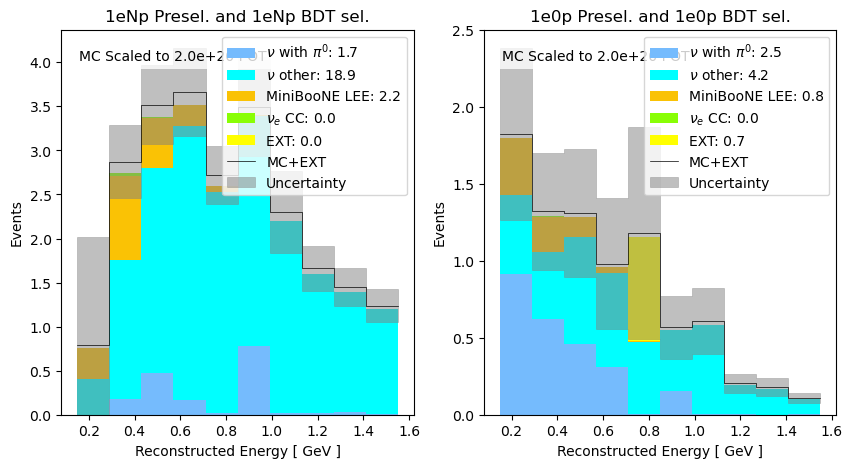

In [12]:
lee_analysis.plot_signals(scale_to_pot=2e20)

In [24]:
lee_analysis.parameters

Parameters:
Name	Value	Unit	Bounds
-------------------------------
signal_strength	1		(0, 10)

DEBUG:plotting.histogram:Histogram found in cache.
DEBUG:plotting.histogram:Using cached total covariance matrix.
DEBUG:plotting.histogram:Generating histogram with query: nslice == 1 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and reco_nu_vtx_sce_x > 5 and reco_nu_vtx_sce_x < 251.  and reco_nu_vtx_sce_y > -110 and reco_nu_vtx_sce_y < 110.  and reco_nu_vtx_sce_z > 20 and reco_nu_vtx_sce_z < 986.  and (reco_nu_vtx_sce_z < 675 or reco_nu_vtx_sce_z > 775)  and topological_score > 0.06  and nslice == 1 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and reco_nu_vtx_sce_x > 5 and reco_nu_vtx_sce_x < 251.  and reco_nu_vtx_sce_y > -110 and reco_nu_vtx_sce_y < 110.  and reco_nu_vtx_sce_z > 20 and reco_nu_vtx_sce_z < 986.  and (reco_nu_vtx_sce_z < 675 or reco_nu_vtx_sce_z > 775)  and topological_score > 0.06  and n_muons_tot > 0 & category == '2'
DEBUG:plotting.histogram:Total number of events after filterin

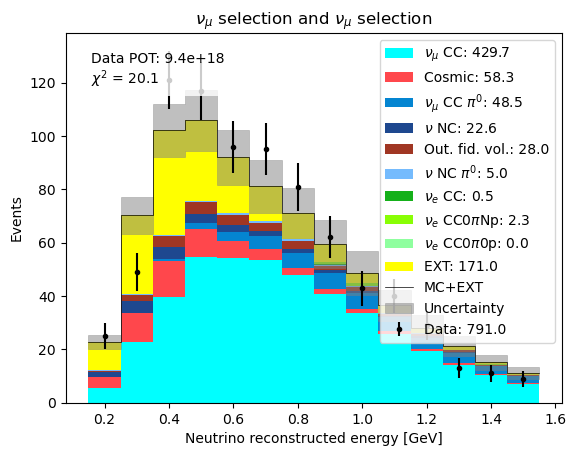

In [11]:
lee_analysis.plot_sideband(show_chi_square=True)

In [13]:
lee_analysis.parameters["signal_strength"].value = 5.0
# lee_analysis.parameters["delta_gamma"].value = 0.0

DEBUG:plotting.histogram:Histogram found in cache.
DEBUG:plotting.histogram:Using cached total covariance matrix.
DEBUG:plotting.histogram:Histogram found in cache.
DEBUG:plotting.histogram:Using cached total covariance matrix.
DEBUG:plotting.histogram:Histogram found in cache.
DEBUG:plotting.histogram:Using cached total covariance matrix.
DEBUG:plotting.histogram:Histogram found in cache.
DEBUG:plotting.histogram:Using cached total covariance matrix.
DEBUG:plotting.histogram:Histogram found in cache.
DEBUG:plotting.histogram:Using cached total covariance matrix.
DEBUG:plotting.histogram:Histogram found in cache.
DEBUG:plotting.histogram:Using cached total covariance matrix.
DEBUG:plotting.histogram:Histogram found in cache.
DEBUG:plotting.histogram:Using cached total covariance matrix.
DEBUG:plotting.histogram:Histogram found in cache.
DEBUG:plotting.histogram:Using cached total covariance matrix.
DEBUG:plotting.histogram:Histogram found in cache.
DEBUG:plotting.histogram:Using cached

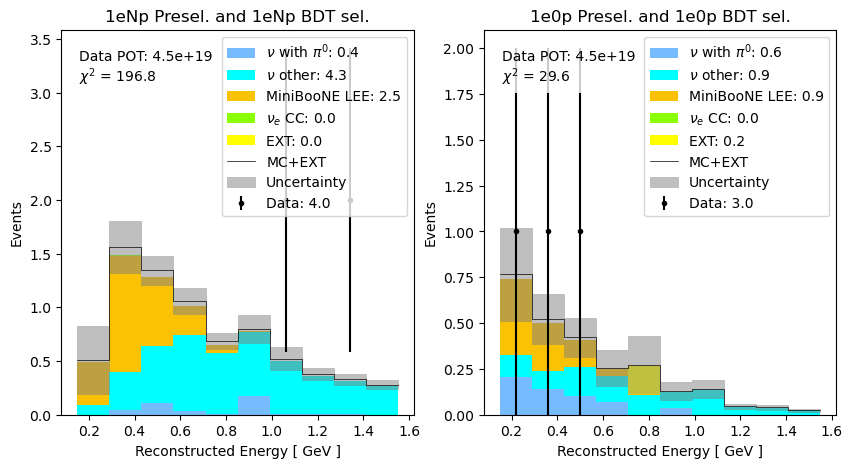

In [14]:
lee_analysis.plot_signals(show_chi_square=True)

DEBUG:plotting.histogram:Multisim histogram found in cache.
DEBUG:plotting.histogram:Histogram found in cache.
DEBUG:plotting.histogram:Using cached total covariance matrix.
DEBUG:plotting.histogram:Multisim histogram found in cache.
DEBUG:plotting.histogram:Multisim histogram found in cache.
DEBUG:plotting.histogram:Histogram found in cache.
DEBUG:plotting.histogram:Using cached total covariance matrix.
DEBUG:plotting.histogram:Histogram found in cache.
DEBUG:plotting.histogram:Using cached total covariance matrix.
DEBUG:plotting.histogram:Multisim histogram found in cache.
DEBUG:plotting.histogram:Multisim histogram found in cache.
DEBUG:plotting.histogram:Histogram found in cache.
DEBUG:plotting.histogram:Using cached total covariance matrix.
DEBUG:plotting.histogram:Histogram found in cache.
DEBUG:plotting.histogram:Using cached total covariance matrix.


(<Figure size 800x600 with 2 Axes>,
 <AxesSubplot:title={'center':'Multiband Correlation: weightsFlux'}>)

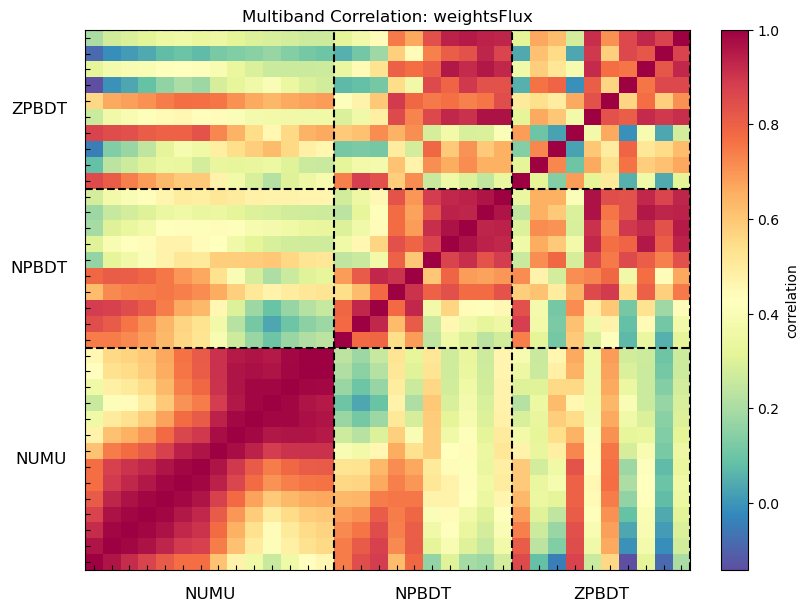

In [16]:
lee_analysis.plot_correlation(ms_column="weightsFlux")